# Import Biasa

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import tensorflow as tf
import io
from io import BytesIO


# Function Buat Upload File

In [ ]:
# Function to load the model from the uploaded file
def load_model_from_uploaded_file(uploaded_file):
    model = None
    try:
        model = tf.keras.models.load_model(uploaded_file)
    except Exception as e:
        print("Error loading model:", str(e))
    return model

# Function Buat Upload Model (Cepet Manual Aku Kebanyakan Ngide)

In [ ]:
# Display upload button for model
print("Upload your model (H5 format):")
uploaded_model = files.upload()

# Wait for model upload
while len(uploaded_model) == 0:
    uploaded_model = files.upload()

Upload your model (H5 format):


Saving batik_model.h5 to batik_model.h5


# Load Model




In [ ]:
# Load the model
model_path = "batik_model.h5"  # Modify this path according to your filename
model = load_model_from_uploaded_file(model_path)

# Function Buat Kebutuhan App (Gak Bakal Keconvert Isinya)

In [ ]:
def predict_and_print_similarity_scores(model, img, class_names):
    # Convert the image to an array and normalize
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make predictions
    predictions = model.predict(img_array)[0]

    # Determine the most likely class
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    predicted_score = predictions[predicted_class_index]

    # Calculate similarity scores
    similarity_scores = {class_names[i]: predictions[i] for i in range(len(predictions))}

    # Print the most likely class and its score
    print(f"Most likely batik motif: {predicted_class} with {predicted_score * 100:.2f}% confidence")

    # Print similarity scores for all classes
    print("Similarity scores for the uploaded image:")
    for class_name, score in similarity_scores.items():
        print(f"{class_name}: {score * 100:.2f}%")

# Download Dataset

In [ ]:
# Download and unzip dataset
!kaggle datasets download -d alfanme/indonesian-batik-motifs-corak-app
!unzip indonesian-batik-motifs-corak-app.zip


Dataset URL: https://www.kaggle.com/datasets/alfanme/indonesian-batik-motifs-corak-app
License(s): CC0-1.0
100% 156M/156M [00:10<00:00, 16.7MB/s]
100% 156M/156M [00:10<00:00, 15.4MB/s]
Archive:  indonesian-batik-motifs-corak-app.zip
  inflating: DATASET/DATASET/TEST/Batik Bali/70.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/71.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/72.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/73.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/74.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/75.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/76.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/77.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/78.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/79.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/80.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/81.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/82.jpg  
  inflating: DATASET/DATASET/TEST/Batik Bali/83.jpg  
  inflating

# Testing Random IMG Dari Val_dataset

Found 300 images belonging to 15 classes.
10/10 [==============================] - 5s 153ms/step


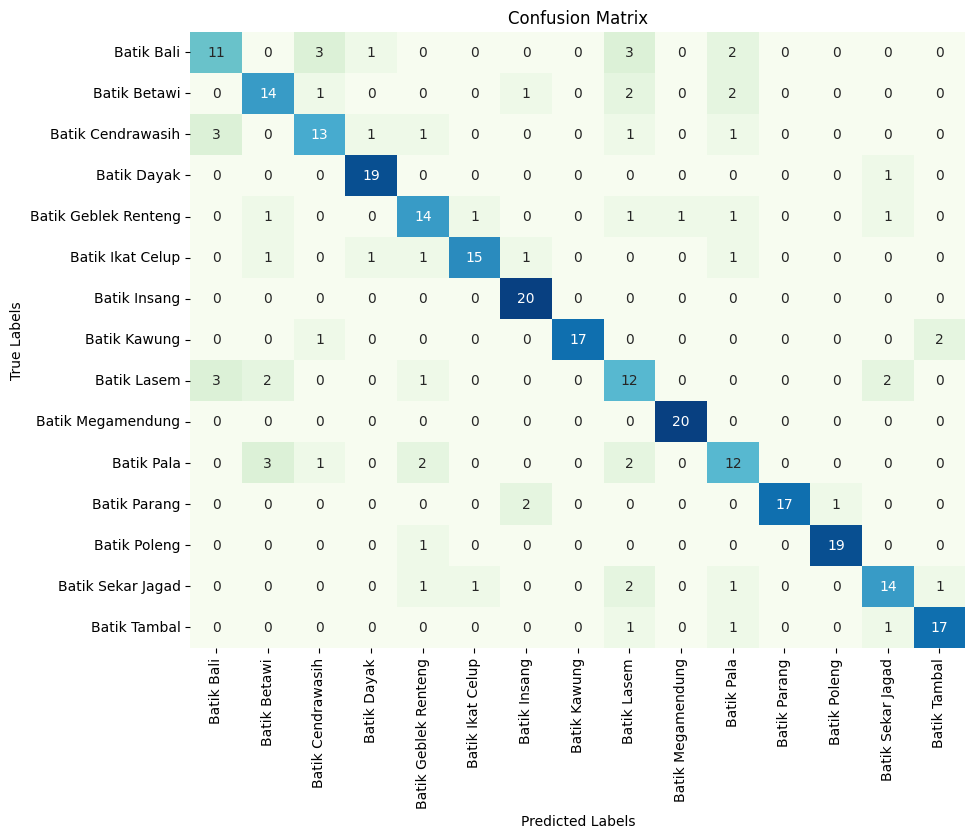

                       precision  recall   f1-score  support
Batik Bali             64.705882    55.0  59.459459    20.00
Batik Betawi           66.666667    70.0  68.292683    20.00
Batik Cendrawasih      68.421053    65.0  66.666667    20.00
Batik Dayak            86.363636    95.0  90.476190    20.00
Batik Geblek Renteng   66.666667    70.0  68.292683    20.00
Batik Ikat Celup       88.235294    75.0  81.081081    20.00
Batik Insang           83.333333   100.0  90.909091    20.00
Batik Kawung          100.000000    85.0  91.891892    20.00
Batik Lasem            50.000000    60.0  54.545455    20.00
Batik Megamendung      95.238095   100.0  97.560976    20.00
Batik Pala             57.142857    60.0  58.536585    20.00
Batik Parang          100.000000    85.0  91.891892    20.00
Batik Poleng           95.000000    95.0  95.000000    20.00
Batik Sekar Jagad      73.684211    70.0  71.794872    20.00
Batik Tambal           85.000000    85.0  85.000000    20.00
accuracy               7

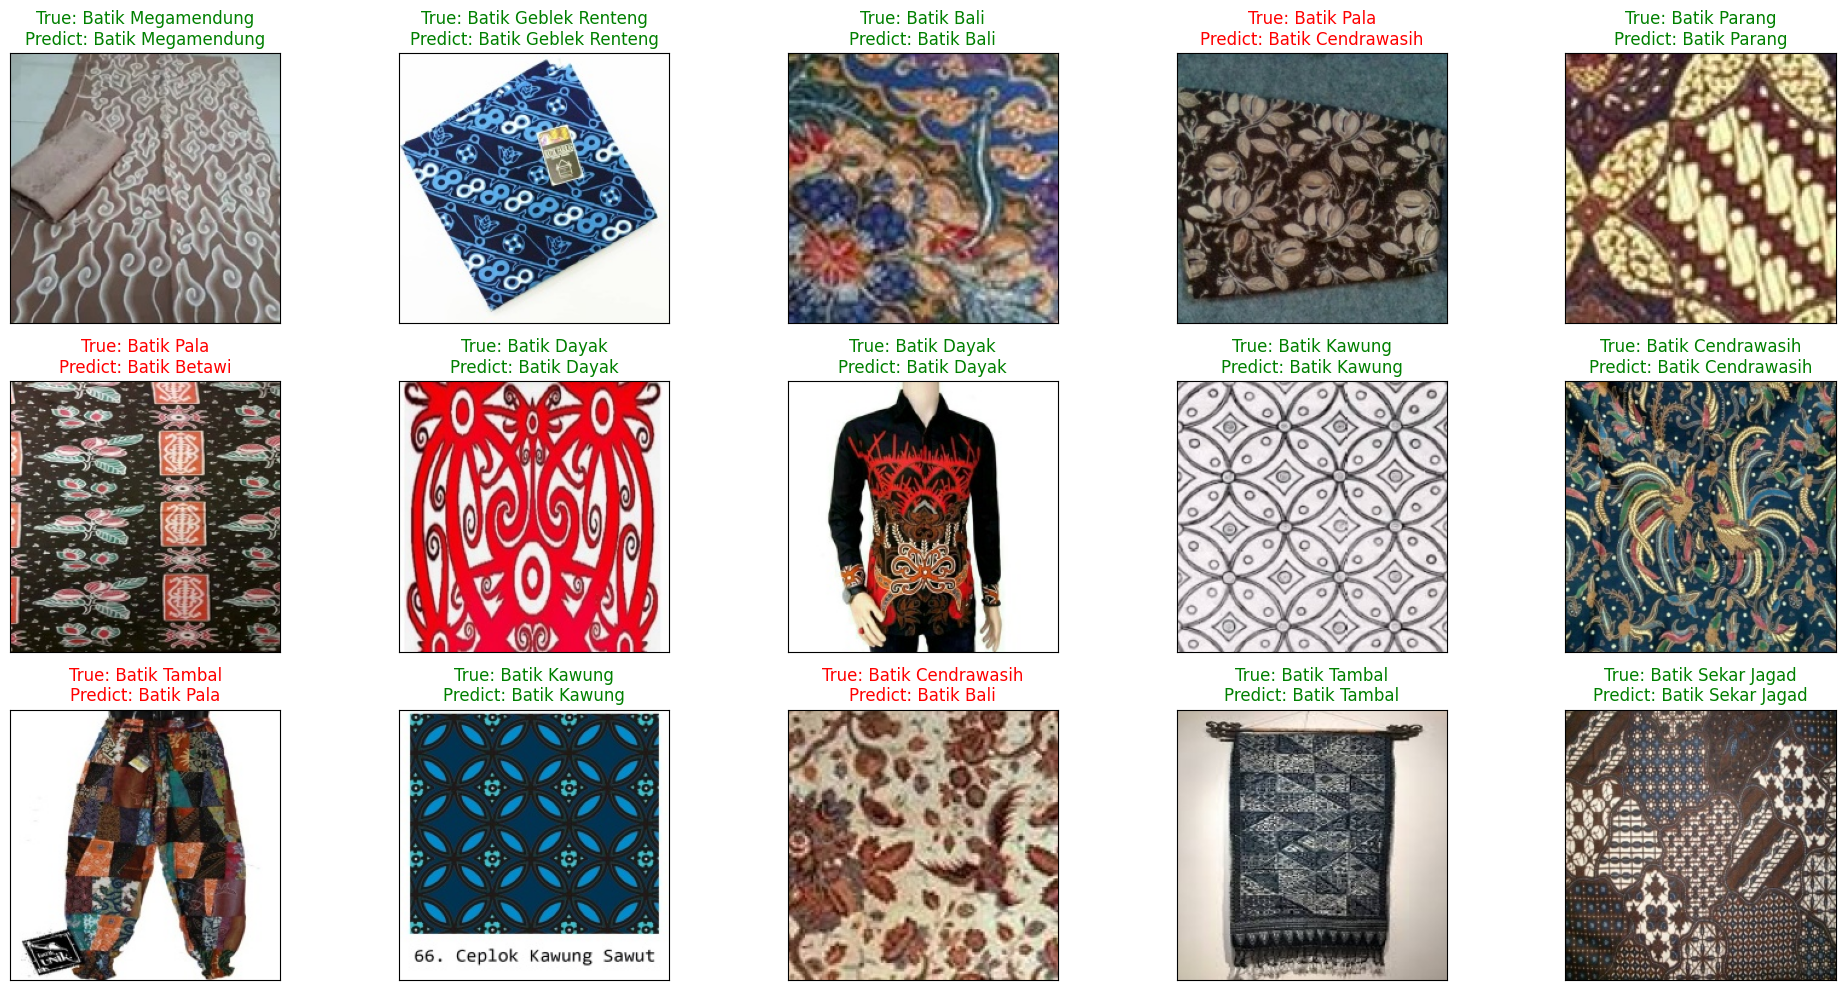

In [ ]:
# Paths to the test data
test_path = './DATASET/DATASET/TEST'

# Data generator for the test set
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=123,
    shuffle=False
)

# Get true labels and predictions
true_labels = val_generator.classes
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Class names
class_names = list(val_generator.class_indices.keys())

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, cmap='GnBu', cbar=False, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report with percentages
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Convert scores to percentages
report_df['precision'] = report_df['precision'] * 100
report_df['recall'] = report_df['recall'] * 100
report_df['f1-score'] = report_df['f1-score'] * 100

print(report_df)

# Randomly select some images and visualize the predictions
random_selection = np.random.randint(0, len(predicted_labels), 15)

fig = plt.figure(figsize=(20, 10))

for i, idx in enumerate(random_selection):
    img_path = val_generator.filepaths[idx]
    image = plt.imread(img_path)
    label = true_labels[idx]
    prediction = predicted_labels[idx]
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(image)
    ax.set_title(f'True: {class_names[label]}\nPredict: {class_names[prediction]}',
                 color=("green" if label == prediction else 'red'), fontsize=12)

plt.tight_layout()
plt.show()

# Testing Prediksi Pake Gambar Dari Luar

In [ ]:
from PIL import Image
import io
from google.colab import files

# Display upload button for image
print("Upload your image for similarity testing:")
uploaded_image = files.upload()

# Wait for image upload
while len(uploaded_image) == 0:
    uploaded_image = files.upload()

# Load the uploaded image and resize it to match the model's input shape
uploaded_image = next(iter(uploaded_image.values()))
image = Image.open(io.BytesIO(uploaded_image))
image = image.resize((224, 224))  # Resize the image to match the model's input shape

# Class names
class_names = ["Batik Bali", "Batik Betawi", "Batik Cendrawasih", "Batik Dayak", "Batik Geblek Renteng", "Batik Ikat Celup", "Batik Insang", "Batik Kawung", "Batik Lasem", "Batik Megamendung", "Batik Pala", "Batik Parang", "Batik Poleng", "Batik Sekar Jagad", "Batik Tambal"]

# Predict and print similarity scores and the most likely class for the uploaded image
predict_and_print_similarity_scores(model, image, class_names)

Upload your image for similarity testing:


Saving 15.jpg to 15.jpg
1/1 [==============================] - 1s 1s/step
Most likely batik motif: Batik Bali with 79.88% confidence
Similarity scores for the uploaded image:
Batik Bali: 79.88%
Batik Betawi: 1.60%
Batik Cendrawasih: 2.77%
Batik Dayak: 5.19%
Batik Geblek Renteng: 0.19%
Batik Ikat Celup: 2.18%
Batik Insang: 0.28%
Batik Kawung: 0.45%
Batik Lasem: 3.91%
Batik Megamendung: 0.65%
Batik Pala: 1.54%
Batik Parang: 0.47%
Batik Poleng: 0.19%
Batik Sekar Jagad: 0.52%
Batik Tambal: 0.19%


# Only Predict Classname

# Function To Predict Claasname

In [ ]:
def predict_class_name(model, img, class_names):
    # Convert the image to an array and normalize
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make predictions
    predictions = model.predict(img_array)[0]

    # Determine the most likely class
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Return the most likely class name
    return predicted_class

# Testing For Uploaded Images

In [ ]:
# Example usage:
from PIL import Image
import io
from google.colab import files

# Display upload button for image
print("Upload your image for class prediction:")
uploaded_image = files.upload()

# Wait for image upload
while len(uploaded_image) == 0:
    uploaded_image = files.upload()

# Load the uploaded image and resize it to match the model's input shape
uploaded_image = next(iter(uploaded_image.values()))
image = Image.open(io.BytesIO(uploaded_image))
image = image.resize((224, 224))  # Resize the image to match the model's input shape

# Class names
class_names = ["Batik Bali", "Batik Betawi", "Batik Cendrawasih", "Batik Dayak", "Batik Geblek Renteng", "Batik Ikat Celup", "Batik Insang", "Batik Kawung", "Batik Lasem", "Batik Megamendung", "Batik Pala", "Batik Parang", "Batik Poleng", "Batik Sekar Jagad", "Batik Tambal"]

# Predict and print the class name for the uploaded image
predicted_class = predict_class_name(model, image, class_names)
print(f"Predicted class: {predicted_class}")

Upload your image for class prediction:


Saving 15.jpg to 15 (1).jpg
1/1 [==============================] - 0s 36ms/step
Predicted class: Batik Bali


# Testing With Confidences

In [ ]:
def predict_class_with_confidence(model, img, class_names):
    # Convert the image to an array and normalize
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make predictions
    predictions = model.predict(img_array)[0]

    # Determine the most likely class
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    confidence_score = predictions[predicted_class_index]

    # Return the predicted class name and confidence score
    return predicted_class, confidence_score

# Test For Uploaded Images

In [ ]:
from PIL import Image
import io
from google.colab import files

# Display upload button for image
print("Upload your image for class prediction:")
uploaded_image = files.upload()

# Wait for image upload
while len(uploaded_image) == 0:
    uploaded_image = files.upload()

# Load the uploaded image and resize it to match the model's input shape
uploaded_image = next(iter(uploaded_image.values()))
image = Image.open(io.BytesIO(uploaded_image))
image = image.resize((224, 224))  # Resize the image to match the model's input shape

# Class names
class_names = ["Batik Bali", "Batik Betawi", "Batik Cendrawasih", "Batik Dayak", "Batik Geblek Renteng", "Batik Ikat Celup", "Batik Insang", "Batik Kawung", "Batik Lasem", "Batik Megamendung", "Batik Pala", "Batik Parang", "Batik Poleng", "Batik Sekar Jagad", "Batik Tambal"]

# Predict the class name and confidence score for the uploaded image
predicted_class, confidence_score = predict_class_with_confidence(model, image, class_names)
print(f"Predicted class: {predicted_class}")
print(f"Confidence score: {confidence_score * 100:.2f}%")

Upload your image for class prediction:


Saving 2.jpg to 2 (2).jpg
1/1 [==============================] - 0s 23ms/step
Predicted class: Batik Cendrawasih
Confidence score: 98.83%


# Multiple

In [ ]:
from PIL import Image
import io
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing.image import img_to_array

# Display upload button for images
print("Upload your images for class prediction:")
uploaded_images = files.upload()

# Class names
class_names = ["Batik Bali", "Batik Betawi", "Batik Cendrawasih", "Batik Dayak", "Batik Geblek Renteng", "Batik Ikat Celup", "Batik Insang", "Batik Kawung", "Batik Lasem", "Batik Megamendung", "Batik Pala", "Batik Parang", "Batik Poleng", "Batik Sekar Jagad", "Batik Tambal"]

# Function to predict class with confidence
def predict_class_with_confidence(model, img, class_names):
    # Convert the image to an array and normalize
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make predictions
    predictions = model.predict(img_array)[0]

    # Determine the most likely class
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    confidence_score = predictions[predicted_class_index]

    # Return the predicted class name and confidence score
    return predicted_class, confidence_score

# Process each uploaded image
for file_name, uploaded_image in uploaded_images.items():
    # Load the uploaded image and resize it to match the model's input shape
    image = Image.open(io.BytesIO(uploaded_image))
    image = image.resize((224, 224))  # Resize the image to match the model's input shape

    # Predict the class name and confidence score for the uploaded image
    predicted_class, confidence_score = predict_class_with_confidence(model, image, class_names)
    print(f"Image: {file_name}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence score: {confidence_score * 100:.2f}%\n")


Upload your images for class prediction:


Saving 1.jpg to 1 (2).jpg
Saving 2.jpg to 2 (3).jpg
Saving 11.jpg to 11 (2).jpg
Saving 15.jpg to 15 (2).jpg
Saving 21.jpg to 21 (2).jpg
Saving 31.jpg to 31 (2).jpg
Saving bridge75-black-no-rgb-1714960892.jpg to bridge75-black-no-rgb-1714960892.jpg
1/1 [==============================] - 0s 21ms/step
Image: 1 (2).jpg
Predicted class: Batik Bali
Confidence score: 58.87%

1/1 [==============================] - 0s 20ms/step
Image: 2 (3).jpg
Predicted class: Batik Cendrawasih
Confidence score: 98.83%

1/1 [==============================] - 0s 21ms/step
Image: 11 (2).jpg
Predicted class: Batik Cendrawasih
Confidence score: 89.19%

1/1 [==============================] - 0s 21ms/step
Image: 15 (2).jpg
Predicted class: Batik Bali
Confidence score: 79.88%

1/1 [==============================] - 0s 21ms/step
Image: 21 (2).jpg
Predicted class: Batik Sekar Jagad
Confidence score: 100.00%

1/1 [==============================] - 0s 22ms/step
Image: 31 (2).jpg
Predicted class: Batik Dayak
Confidence sc

# Import Ke TFLITE

In [ ]:
import tensorflow as tf
import os

# Load the Keras model
model = tf.keras.models.load_model('batik_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
tflite_model_path = 'batik_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# Automatically download the TensorFlow Lite model
os.system('zip -r batik_model.zip batik_model.tflite')
files.download('batik_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Tfjs

In [ ]:
import os
from google.colab import files
!pip install tensorflowjs


# Convert the model to TensorFlow.js format
os.system('tensorflowjs_converter --input_format keras batik_model.h5 tfjs_model')

# Zip the TensorFlow.js model folder
os.system('zip -r tfjs_model.zip tfjs_model')

# Automatically download the zip file
files.download('tfjs_model.zip')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>